In [783]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import matplotlib as mpl

In [785]:
iris = load_iris(as_frame=True)
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [787]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [789]:
def to_one_hot(y):
    return np.diag(np.ones(y.max() + 1))[y]

In [791]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [793]:
from sklearn.model_selection import train_test_split

In [795]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [797]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_valid = (X_valid - mean) / std
X_test = (X_test - mean) / std

In [799]:
y_train_onehot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
y_train_onehot[:10]

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [801]:
X_train_with_bias = np.c_[np.ones(len(X_train)), X_train]
X_valid_with_bias = np.c_[np.ones(len(X_valid)), X_valid]
X_test_with_bias = np.c_[np.ones(len(X_test)), X_test]
X_train_with_bias[:10]

array([[ 1.        ,  0.58382847,  0.77996804],
       [ 1.        ,  0.52732894,  0.3865691 ],
       [ 1.        , -0.03766635, -0.2690958 ],
       [ 1.        , -1.16765695, -1.31815965],
       [ 1.        ,  0.97932518,  1.17336698],
       [ 1.        ,  1.09232424,  1.17336698],
       [ 1.        ,  1.65731954,  1.042234  ],
       [ 1.        , -1.39365507, -1.31815965],
       [ 1.        ,  0.41432988,  0.3865691 ],
       [ 1.        ,  1.43132142,  0.77996804]])

In [803]:
n_inputs = X_train_with_bias.shape[1]  # == 3 (2 features plus the bias term)
n_outputs = len(np.unique(y_train))  # == 3 (there are 3 iris classes)
n_inputs,n_outputs

(3, 3)

# <font color = 'purple'> Implementation Gradient Descent For Softmax Without Early Stopping</font>

In [806]:
def softmax(x):
    a = np.exp(x)
    b = a.sum(axis=1 ,keepdims = True)
    return a/b

In [808]:
np.random.seed(42)
Theta = np.random.randn(n_inputs, n_outputs)

#### Epsilon is added to avoid taking the logarithm of zero --> log(0) = -ve(inf)

In [811]:
iteration = 5001
learning_rate = 0.5
m = len(X_train)
epsilon = 1e-5
np.random.seed(42)
Theta = np.random.randn(n_inputs, n_outputs)

for i in range(iteration):
    logits = X_train_with_bias @ Theta
    Y_proba = softmax(logits)

    if i % 1000 == 0:
        Y_proba_valid = softmax(X_valid_with_bias @ Theta)
        xentropy_losses = -(Y_valid_one_hot * np.log(Y_proba_valid + epsilon))
        print(i, xentropy_losses.sum(axis=1).mean())
    
    error = Y_proba - y_train_onehot
    gradients = 1 / m * X_train_with_bias.T @ error
    Theta = Theta - learning_rate * gradients

0 3.393544130870494
1000 0.09796287002556885
2000 0.0911234544936842
3000 0.08986484535129613
4000 0.0897139176666739
5000 0.08985470365647608


In [813]:
logits = X_valid_with_bias @ Theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

accuracy_score = (y_predict == y_valid).mean()
accuracy_score

0.9583333333333334

In [815]:
logits = X_test_with_bias @ Theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

accuracy_score = (y_predict == y_test).mean()
accuracy_score

1.0

# <font color = 'purple'> Implementation Gradient Descent For Softmax With Early Stopping </font>

In [818]:
iteration = 5001
learning_rate = 0.5
m = len(X_train)
epsilon = 1e-5
np.random.seed(42)
best_loss = np.infty
Theta = np.random.randn(n_inputs, n_outputs)

for i in range(iteration):
    logits = X_train_with_bias @ Theta
    Y_proba = softmax(logits)
    
    Y_proba_valid = softmax(X_valid_with_bias @ Theta)
    xentropy_losses = -(Y_valid_one_hot * np.log(Y_proba_valid)) # Cross entropy cost function
    total_loss = xentropy_losses.sum(axis=1).mean()
    
    if i % 1000 == 0:
        print(i, total_loss.round(4))

    if total_loss < best_loss:
        best_loss = total_loss

    else:
        print(i, total_loss.round(4), "early stopping!")
        break
    
    error = Y_proba - y_train_onehot
    gradients = 1 / m * X_train_with_bias.T @ error
    Theta = Theta - learning_rate * gradients

0 3.3943
1000 0.098
2000 0.0911
3000 0.0899
3810 0.0897 early stopping!


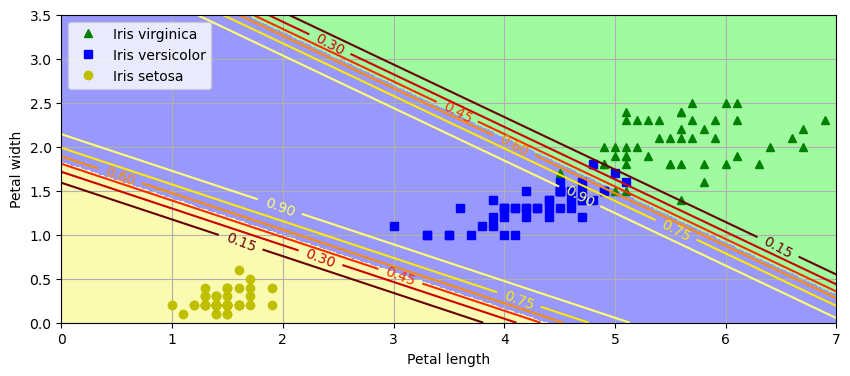

In [820]:
custom_cmap = mpl.colors.ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])

x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new = (X_new - mean) / std
X_new_with_bias = np.c_[np.ones(len(X_new)), X_new]

logits = X_new_with_bias @ Theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap="hot")
plt.clabel(contour, inline=1)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.axis([0, 7, 0, 3.5])
plt.grid()
plt.show()